# Submission Belajar Analisis Data Menggunakan python

# Bike Sharing

## Menyiapkan semua library yang dibutuhkan

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling


### Gathering Data

In [148]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [149]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

In [150]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [151]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [152]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [153]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [154]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [155]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan Data day_df

In [156]:
datetime_day_columns = ["dteday"]
 
for column in datetime_day_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [157]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan Data hour_df

In [158]:
datetime_hour_columns = ["dteday"]
 
for column in datetime_hour_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [159]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [160]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [161]:
season_grouped = day_df.groupby(by="season").agg(
    instant_nunique=('instant', 'nunique'),
    cnt_max=('cnt', 'max'),
    cnt_min=('cnt', 'min'),
    cnt_mean=('cnt', 'mean'),
    cnt_std=('cnt', 'std')
).reset_index()

season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
season_grouped['season_name'] = season_grouped['season'].map(season_mapping)
season_grouped = season_grouped[['season_name', 'instant_nunique', 'cnt_max', 'cnt_min', 'cnt_mean', 'cnt_std']]
season_grouped

,season_name,instant_nunique,cnt_max,cnt_min,cnt_mean,cnt_std
0,Spring,181,7836,431,2604.132597,1399.942119
1,Summer,184,8362,795,4992.331522,1695.977235
2,Fall,188,8714,1115,5644.303191,1459.800381
3,Winter,178,8555,22,4728.162921,1699.615261


In [162]:
weather_type_df = day_df[day_df['weathersit'].isin([1, 2, 3, 4])]
weather_type_df['weather_condition'] = weather_type_df['weathersit'].apply(
    lambda x: 'Normal' if x in [1, 2] else 'Extreme')
weather_condition_grouped = weather_type_df.groupby('weather_condition').agg({
    "cnt": ["mean", "std", "max", "min"] 
})
weather_condition_grouped

cnt                        
                          mean          std   max  min
weather_condition                                     
Extreme            1803.285714  1240.284449  4639   22
Normal             4584.239437  1896.856251  8714  431

### Explore `hour_df`

In [163]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [164]:
may_2012_workingdays = hour_df[(hour_df['yr'] == 1) & (hour_df['mnth'] == 5) & (hour_df['workingday'] == 1)]
may_2012_hourly = may_2012_workingdays.groupby('hr').agg({
    "cnt": "mean" 
}).reset_index()
peak_hours_may_2012 = may_2012_hourly[may_2012_hourly['cnt'] > 3000]
peak_hours_may_2012

,hr,cnt


In [165]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [166]:
all_df.to_csv("dashboard/main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana kondisi musim mempengaruhi jumlah penyewaan sepeda?

In [167]:
season_grouped_avg = all_df.groupby(by="season_x").agg(
    instant_nunique=('instant', 'nunique'),
    cnt_max=('cnt_x', 'max'),
    cnt_min=('cnt_x', 'min'),
    cnt_mean=('cnt_x', 'mean'),
    cnt_std=('cnt_x', 'std')
).reset_index()
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
season_grouped_avg['season_name'] = season_grouped_avg['season_x'].map(season_mapping)
season_grouped_avg = season_grouped[['season_name', 'instant_nunique', 'cnt_max', 'cnt_min', 'cnt_mean', 'cnt_std']]
season_grouped_avg

,season_name,instant_nunique,cnt_max,cnt_min,cnt_mean,cnt_std
0,Spring,181,7836,431,2604.132597,1399.942119
1,Summer,184,8362,795,4992.331522,1695.977235
2,Fall,188,8714,1115,5644.303191,1459.800381
3,Winter,178,8555,22,4728.162921,1699.615261


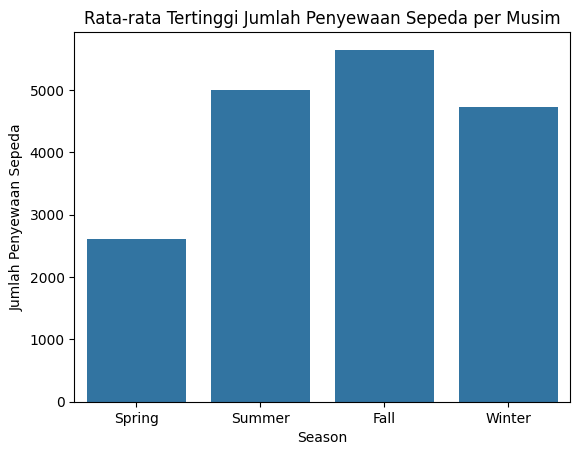

In [168]:
season_avg = season_grouped_avg[['season_name', 'cnt_mean']]
sns.barplot(x='season_name', y='cnt_mean', data=season_avg)
plt.title('Rata-rata Tertinggi Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Season')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Apa perbedaan jumlah penyewaan sepeda antara cuaca normal dan cuaca ekstrim?

In [169]:
weather_type_df = all_df[all_df['weathersit_x'].isin([1, 2, 3, 4])]
weather_type_df['weather_condition'] = weather_type_df['weathersit_x'].apply(
    lambda x: 'Normal' if x in [1, 2] else 'Extreme'
)
weather_condition_grouped = weather_type_df.groupby('weather_condition').agg({
    "cnt_x": ["mean", "std", "max", "min"]
}).reset_index()

weather_condition_grouped


weather_condition        cnt_x                        
                            mean          std   max  min
0           Extreme  1803.285714  1240.284449  4639   22
1            Normal  4584.239437  1896.856251  8714  431

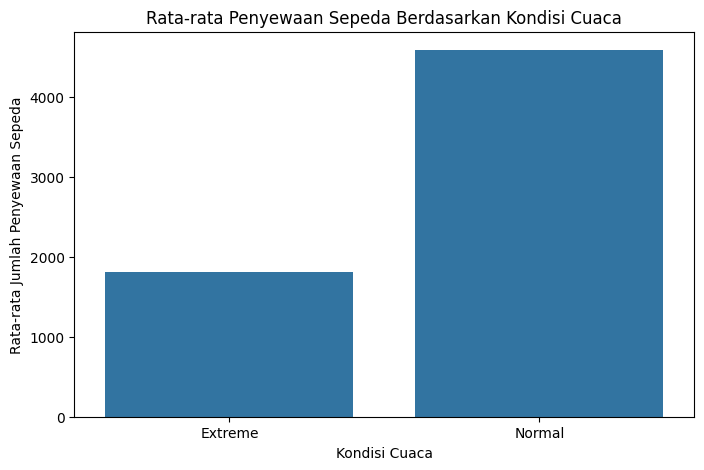

In [170]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_condition', y=('cnt_x', 'mean'), data=weather_condition_grouped)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

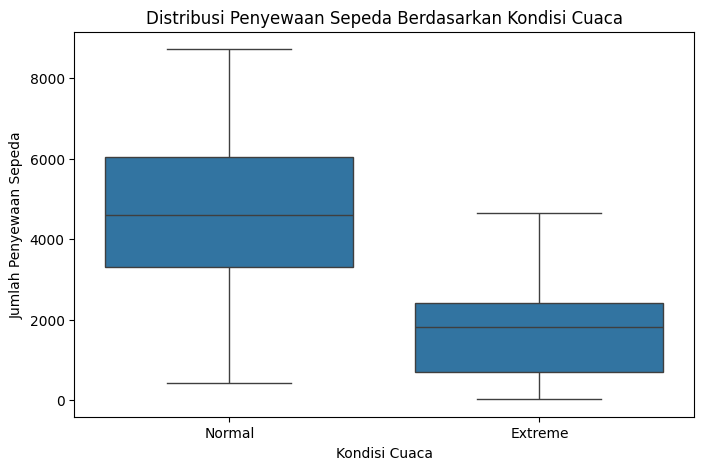

In [171]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather_condition', y='cnt_x', data=weather_type_df)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Di jam-jam tertentu pada hari kerja, apakah jumlah penyewaan sepeda rata-rata lebih dari 3000 dalam satu jam?

In [172]:
workingdays = all_df[(all_df['workingday_x'] == 1)]
hourly = workingdays.groupby('hr').agg({
    "cnt_x": "mean"
}).reset_index()
peak_hours= hourly[hourly['cnt_x'] > 3000]
peak_hours

,hr,cnt_x
0,0,4950.347826
1,1,4813.272727
2,2,4580.409091
3,3,4359.384615
4,4,4075.000000
5,5,4438.190476
6,6,4671.111111
7,7,4729.850000
8,8,4674.894737
9,9,4275.541667


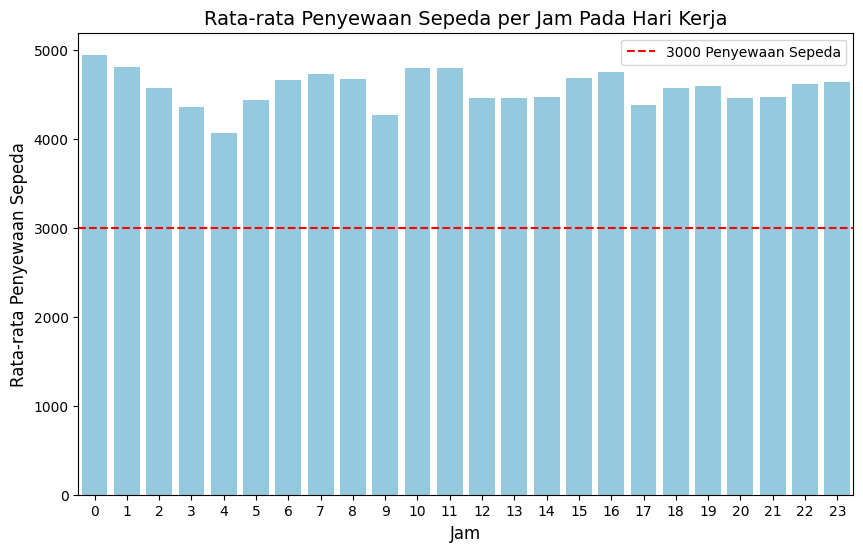

In [173]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt_x', data=hourly, color='skyblue')
plt.axhline(3000, color='red', linestyle='--', label='3000 Penyewaan Sepeda')
plt.title('Rata-rata Penyewaan Sepeda per Jam Pada Hari Kerja', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.legend()
plt.show()

## RFM Analysis (Recency, Frequency, Monetary)

In [174]:
# Memuat dataset dan mengatur kolom waktu
all_df['dteday_x'] = pd.to_datetime(all_df['dteday_x'])

# Menghitung Recency berdasarkan selisih tanggal
last_rent_date = all_df['dteday_x'].max()
all_df['recency'] = (last_rent_date - all_df['dteday_x']).dt.days


all_df['frequency'] = all_df.groupby('cnt_x')['cnt_x'].transform('count')

all_df['monetary'] = all_df['cnt_x']

# Menghitung kuartil untuk setiap parameter
quantiles = all_df[['recency', 'frequency', 'monetary']].quantile([0.25, 0.5, 0.75])

# Fungsi untuk memberikan skor RFM berdasarkan kuartil
def rfm_score(x, quantiles):
    if x <= quantiles[0.25]:
        return 1
    elif x <= quantiles[0.5]:
        return 2
    elif x <= quantiles[0.75]:
        return 3
    else:
        return 4

# Menambahkan skor RFM untuk Recency, Frequency, dan Monetary
all_df['recency_score'] = all_df['recency'].apply(rfm_score, quantiles=quantiles['recency'])
all_df['frequency_score'] = all_df['frequency'].apply(rfm_score, quantiles=quantiles['frequency'])
all_df['monetary_score'] = all_df['monetary'].apply(rfm_score, quantiles=quantiles['monetary'])

# Membuat grup berdasarkan skor RFM
all_df['rfm_group'] = all_df['recency_score'].astype(str) + all_df['frequency_score'].astype(str) + all_df['monetary_score'].astype(str)

all_df[['dteday_x', 'recency', 'frequency', 'monetary']].head()

,dteday_x,recency,frequency,monetary
0,2011-01-01,730,1,985
1,2011-01-02,729,1,801
2,2011-01-03,728,1,1349
3,2011-01-04,727,1,1562
4,2011-01-05,726,1,1600


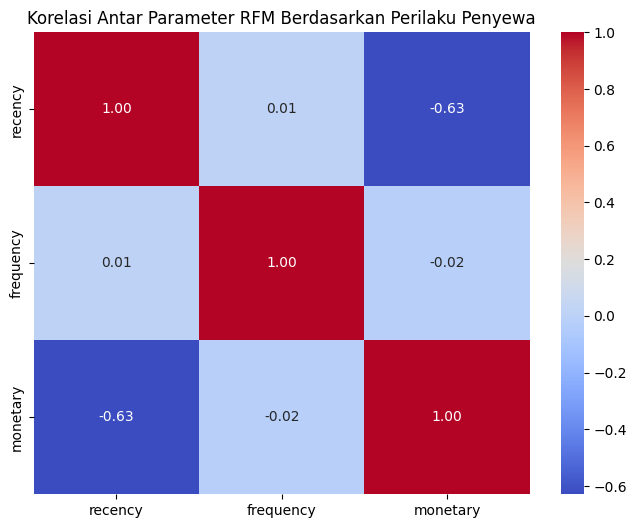

In [175]:
rfm_data = all_df[['recency', 'frequency', 'monetary']]

correlation_matrix = rfm_data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Korelasi Antar Parameter RFM Berdasarkan Perilaku Penyewa')
plt.show()

## Clustering

### Manual Grouping

In [176]:
bins = [0, 1000, 2000, 3000, 4000, 5000] 
labels = ['Low', 'Medium', 'High', 'Very High', 'Extreme']  
all_df['rental_group'] = pd.cut(all_df['cnt_x'], bins=bins, labels=labels)
all_df[['dteday_x', 'cnt_x', 'rental_group']].head()

,dteday_x,cnt_x,rental_group
0,2011-01-01,985,Low
1,2011-01-02,801,Low
2,2011-01-03,1349,Medium
3,2011-01-04,1562,Medium
4,2011-01-05,1600,Medium


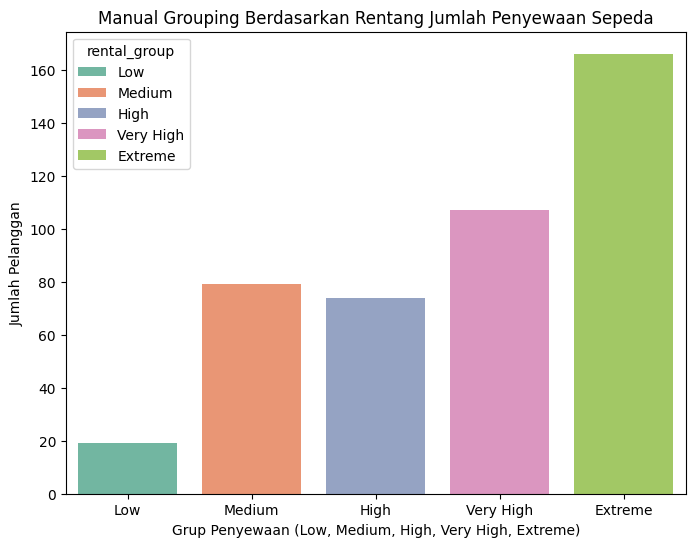

In [177]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rental_group', data=all_df, hue='rental_group', palette='Set2')
plt.title('Manual Grouping Berdasarkan Rentang Jumlah Penyewaan Sepeda')
plt.xlabel('Grup Penyewaan (Low, Medium, High, Very High, Extreme)')
plt.ylabel('Jumlah Pelanggan')
plt.show()


### Binning

In [178]:
bin_edges = [0,1000, 2000, 3000, 4000, 5000]
bin_labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000']
all_df['cnt_group'] = pd.cut(all_df['cnt_x'], bins=bin_edges, labels=bin_labels)
all_df[['dteday_x', 'cnt_x', 'cnt_group']].head()

,dteday_x,cnt_x,cnt_group
0,2011-01-01,985,0-1000
1,2011-01-02,801,0-1000
2,2011-01-03,1349,1001-2000
3,2011-01-04,1562,1001-2000
4,2011-01-05,1600,1001-2000


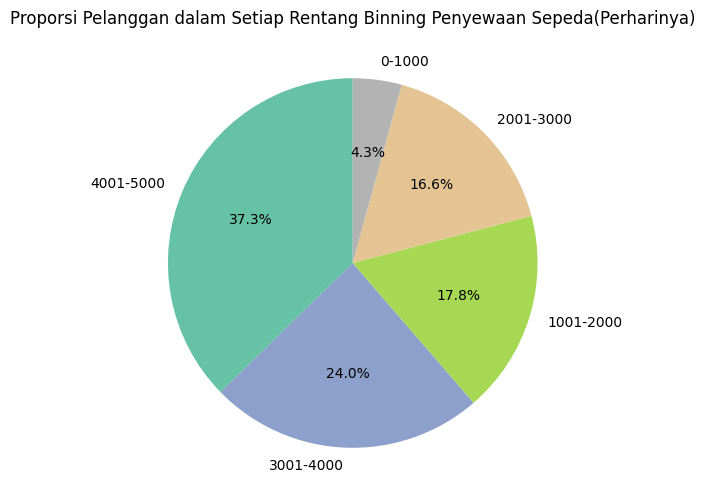

In [179]:
plt.figure(figsize=(8, 6))
cnt_group_counts = all_df['cnt_group'].value_counts()
cnt_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Proporsi Pelanggan dalam Setiap Rentang Binning Penyewaan Sepeda(Perharinya)')
plt.ylabel('')
plt.show()
